# (A) Identification of Candidate Datasets

## 1.
Dataset name: Elliptic++ Bitcoin Blockchain Dataset

---

github: https://github.com/git-disl/EllipticPlusPlus/tree/main/Transactions%20Dataset

research paper: https://ieeexplore.ieee.org/abstract/document/9916625

---

Course topic alignment:
  - Graph Mining
  - Large-Scale ML
  - Anomaly Detection
  - Graph Embeddings

---

Potential beyond-course techniques:
  - Graph Neural Networks (GCN)
  - Semi-supervised learning using "unkown" labels

---

Dataset size and structure (from github documentation):
- Nodes (transactions):	203,769
- Edges (money flow):	234,355
- Time steps: 49
- Illicit (class-1): 4,545
- Licit (class-2): 42,019
- Unknown (class-3): 157,205
- Features: 18

---

Data types:
 - Transaction ID (unique identifiers)
 - Directed edges (money flow between transactions)
 - 18 numerical transaction features
 - Class label (licit/illicit/unknown)
 - Discrete Time index

---

Target variables:
 - Binary fraud classification: illicit vs licit transaction

---

Licensing or usage constraints
 - Public research dataset
 - Intended for academic research use

## 2.
Dataset name: Instacart Online Grocery Shopping Dataset (2017)

https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset

---

Course topic alignment:
  - Frequent Itemset
  - LSH for similar baskets
  - Stream mining

---

Potential beyond-course techniques:
  - Sequential pattern mining
  - Time-series forecasting
  - Recurrent neural networks

---

Dataset size and structure:
  - 3+ million grocery orders
  - ~200,000 users
  - Multiple related CSV files (orders, products, aisles, departments, order_products_prior, order_products_train)
  - relations

---

Data types:

 - Order ID, User ID (unique identifiers)
 - Order day of week (categorical)
 - Order hour of day (time category)
 - Reordered flag (binary indicator)
 - Product Metadata: Product name, Aisle ID, Department ID

---

Target variables:
 - Predict reorder probability
 - Basket completion

---
Licensing:
 - Public research dataset
 - no known restrictions.

## 3.
Dataset name: Amazon Product Co-Purchasing & Reviews Dataset

Source: SNAP dataset collection - https://snap.stanford.edu/data/amazon-meta.html

---

Course topic alignment:
 - Frequent Itemset
 - Graph Mining
 - Large-Scale ML
 - Clustering
 - Text Mining
 - Graph Embeddings
 - LSH

---

Potential beyond-course techniques:
 - Graph Neural Networks for recommendation
 - Transformer-based review embeddings (BERT)
 - Contrastive learning for product similarity
 - Multi-modal learning (text + graph + rating signals)

---

Dataset size and structure:
  - Products (nodes): 548,552
  - Product-Project Edges: 1,788,725
  - Reviews: 7,781,990
  - Product category memberships: 2,509,699
  - Books: 393561
  - DVDs: 19828
  - Music CDs: 103144
  - Videos: 26132

---

Data types:
- Product ID: Unique identifier for each product.
- ASIN: Amazon Standard Identification Number (string identifier).
- Title: Product title text (name).
- Group: Product broad category (e.g., Books, DVDs).
- Salesrank: Numeric ranking indicating product popularity.
- Similar products: Lists of ASINs representing co-purchases (edges).
- Categories: Hierarchical category labels for each product.
- Review records: Review timestamp, Reviewer ID, Rating (numeric), Helpfulness votes, Number of vote

---

Target variables (potential):
- Product category classification
- Product popularity prediction
- Node classification in co-purchase graph
- Link prediction
- Sentiment analysis using review text

---

Licensing or usage constraints
 - Research dataset
 - Publicly available for academic use

# (B) Comparative Analysis of Datasets

| Dimension | Elliptic++ | Instacart | Amazon |
|------------|------------|------------|------------|
| **Course Tasks** | Graph mining, anomaly detection, large-scale ML, graph embeddings | Frequent itemsets, association rules, clustering, LSH | Graph mining, text mining, clustering, LSH |
| **External Techniques** | GNNs, temporal graph models, explainable AI | Sequential patterns, time-series forecasting | Transformers, deep recommenders, knowledge graphs |
| **Data Quality Issues** | Class imbalance, unknown labels, graph sparsity | Missing orders, reorder bias | Noisy text, fake reviews, sparse user–item graph |
| **Algorithmic Feasibility** | Manageable graph size; GNNs feasible but heavier | Apriori feasible on subsets; sequential mining heavier | Must subset; deep models computationally heavier |
| **Bias Considerations** | Fraud labeling bias, sampling bias | Heavy-user bias, platform bias | Popularity bias, review manipulation |
| **Ethical Considerations** | Risk of fraud misclassification | Minimal harm risk | Recommendations affect sellers and consumers |


# (C) Dataset Selection
**Elliptic++ Bitcoin Blockchain Transaction Dataset**

---

Reasons:
- Supports key course topics like graph mining, anomaly detection, and large-scale machine learning.
- Includes labeled fraud data, which allows for supervised modeling.
- Works well for graph embeddings, which are covered later in the course.
- Allows exploration of advanced methods like Graph Neural Networks (GNNs).
- Uses real-world financial data, making the project practical and resume-relevant.


Compared to the other candidates, Elliptic++ uniquely supports both graph structure and temporal dynamics, making it ideal for exploring advanced graph mining techniques beyond static analysis

---

Tradeoffs:
- Fraud cases are rare, which may make modeling harder.
- Graph models are more complex than simple tabular models.
- Requires extra preprocessing to build and analyze the graph.
- Does not include text data.

# (D) Exploratory Data Analysis

I consulted the dataset’s GitHub repository for schema clarification and prior reported statistics, but performed all EDA independently to validate findings and explore additional patterns.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load & Sanity Check

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview
features = pd.read_csv("drive/MyDrive/txs_features.csv")
classes = pd.read_csv("drive/MyDrive/txs_classes.csv")
edges = pd.read_csv("drive/MyDrive/txs_edgelist.csv")

# display data
print("Features shape:", features.shape)
print("Classes shape:", classes.shape)
print("Edges shape:", edges.shape)

print("\nFeatures:")
display(features.head())
print("\nClasses:")
display(classes.head())
print("\nEdges:")
display(edges.head())

Features shape: (203769, 184)
Classes shape: (203769, 2)
Edges shape: (234355, 2)

Features:


,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680



Classes:


,txId,class
0,3321,3
1,11108,3
2,51816,3
3,68869,2
4,89273,2



Edges:


,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


###  Check schemas & missing values

In [4]:
features.columns = features.columns.str.strip()
classes.columns  = classes.columns.str.strip()
edges.columns    = edges.columns.str.strip()

print("features txId unique:", features["txId"].nunique())
print("classes txId unique :", classes["txId"].nunique())

print("features txId dtype:", features["txId"].dtype)
print("classes txId dtype :", classes["txId"].dtype)

# missing values quick scan
print("\nMissing values (features) top 10:")
display(features.isna().sum().sort_values(ascending=False).head(10))

print("\nMissing values (classes):")
display(classes.isna().sum())

print("\nMissing values (edges):")
display(edges.isna().sum())

# duplicates
print("\nDuplicate txId (features):", features["txId"].duplicated().sum())
print("Duplicate txId (classes) :", classes["txId"].duplicated().sum())
print("Duplicate edges:", edges.duplicated().sum())

features txId unique: 203769
classes txId unique : 203769
features txId dtype: int64
classes txId dtype : int64

Missing values (features) top 10:


,0
in_BTC_mean,965
in_BTC_median,965
in_BTC_total,965
out_BTC_min,965
out_BTC_max,965
out_BTC_mean,965
out_BTC_median,965
out_txs_degree,965
in_txs_degree,965
total_BTC,965



Missing values (classes):


,0
txId,0
class,0



Missing values (edges):


,0
txId1,0
txId2,0



Duplicate txId (features): 0
Duplicate txId (classes) : 0
Duplicate edges: 0


## Data Statistics
Node Labels

1.   illicit
2.   licit
3. unknown



/tmp/ipython-input-2859681408.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Illicit', 'Licit', 'Unknown'])


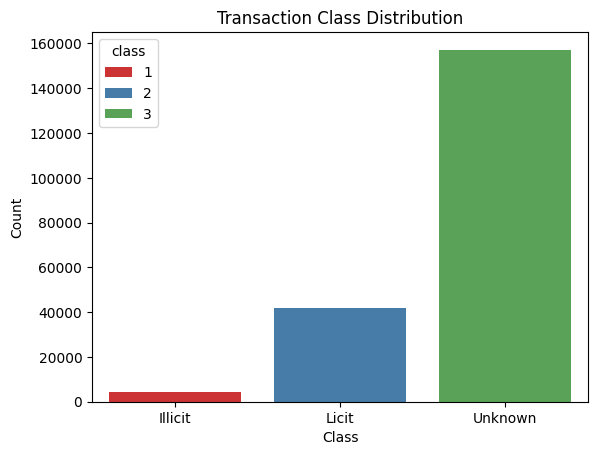

Unmapped labels (no time step found): 0


class,1,2,3
Time step,,,
1,17,2130,5733
2,18,1099,3427
3,11,1268,5342
4,30,1410,4253
5,8,1874,4921


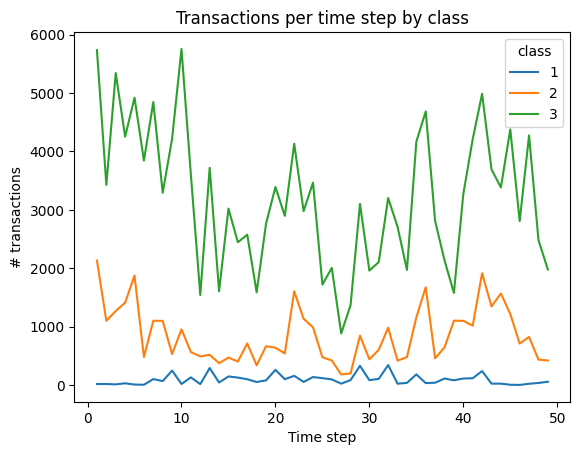

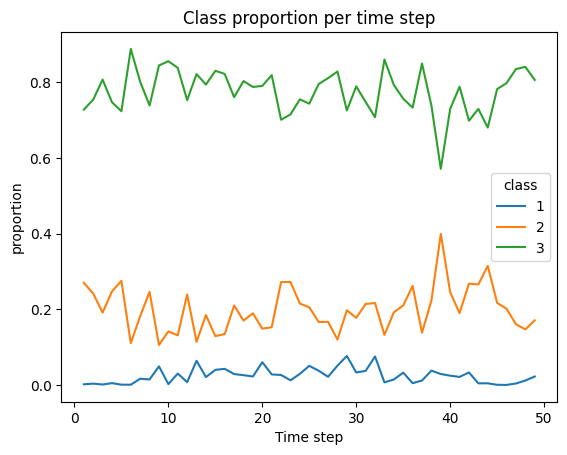

In [5]:
# number of transactions by class
features.insert(loc=2, column='class', value=classes['class'])
features['class'].value_counts()

ax = sns.countplot(x="class", data=features, palette='Set1', hue='class')
ax.set_xticklabels(['Illicit', 'Licit', 'Unknown'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# number of transactions by time step
tx_to_t = dict(zip(features["txId"], features["Time step"]))
classes_ts = classes.copy()
classes_ts["Time step"] = classes_ts["txId"].map(tx_to_t)

# check how many txIds failed to map
print("Unmapped labels (no time step found):", classes_ts["Time step"].isna().sum())

ct = classes_ts.groupby(["Time step", "class"]).size().unstack(fill_value=0).sort_index()
display(ct.head())

ct.plot()
plt.title("Transactions per time step by class")
plt.xlabel("Time step")
plt.ylabel("# transactions")
plt.show()

# proportions by time
ct_prop = ct.div(ct.sum(axis=1), axis=0)
ct_prop.plot()
plt.title("Class proportion per time step")
plt.xlabel("Time step")
plt.ylabel("proportion")
plt.show()

The dataset exhibits extreme class imbalance across all time stepes, with illicit transactions representing only a tiny fraction of total activity. The unknown class constitutes the majority of transactions across all time steps, indicating that most transactions lack known labels. This suggests that semi-surpervised or unsupervised methods may be appropriate for leveraging unlabeled data.

Transaction counts vary across time steps, indicating the networ activity is dynamic rather than constant. The temporal variability supports the use of time-aware models. The sparsity of illicit transactions suggests the detection may require tempral context rather than relying solely on individual transaction features.

## Feature Analysis

,Feature,Imp
169,size,0.046272
54,Local_feature_55,0.044621
17,Local_feature_18,0.043210
46,Local_feature_47,0.040056
52,Local_feature_53,0.039920
171,num_output_addresses,0.038125
40,Local_feature_41,0.029631
22,Local_feature_23,0.027111
131,Aggregate_feature_39,0.026706
89,Local_feature_90,0.026553


<Figure size 1000x800 with 0 Axes>

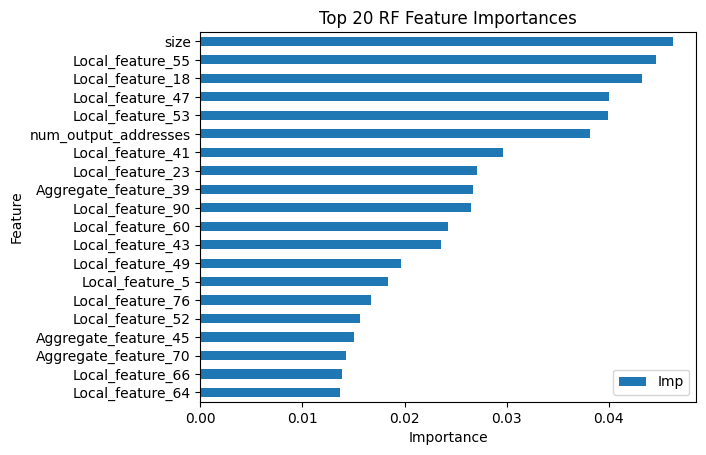

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# labeled only
df_lab = features[features["class"].isin([1,2])].copy()

X = df_lab.drop(columns=["txId", "Time step", "class"])
y = df_lab["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# train RF
cRF = RandomForestClassifier(
    n_estimators=50,   # reduced for speed
    random_state=42,
    n_jobs=-1
)

cRF.fit(X_train, y_train)

# feature importance
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": cRF.feature_importances_
}).sort_values("Imp", ascending=False)

display(imp_df.head(20))

plt.figure(figsize=(10, 8))
imp_df.head(20).iloc[::-1].plot(kind="barh", x="Feature", y="Imp")
plt.title("Top 20 RF Feature Importances")
plt.xlabel("Importance")
plt.show()


Feature importance analysis indicates that both transaction-level attributes and graph-based features contribute to distinguishing transaction classes. Transaction size emerged as the most informative feature, suggesting systematic differences in transaction magnitude between illicit and licit behavior. The number of output addresses was also highly important, consistent with the use of address-splitting strategies to obsure fund flows. The relatively similar importance values across features suggest that illicit detection relies on a combination of factors rather than a single dominant indicator.

## Graph and Basic Statistics

Graph basics
Nodes: 203769
Edges: 234355
Density: 5.644170528459417e-06
Fraction of edges with src not in features: 0.0
Fraction of edges with dst not in features: 0.0

In-degree quantiles: [  0.   1.   1.   9. 284.]
Out-degree quantiles: [  0.   1.   2.   5. 472.]


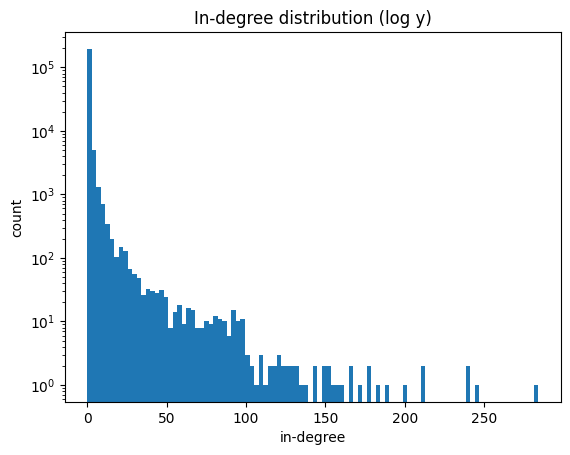

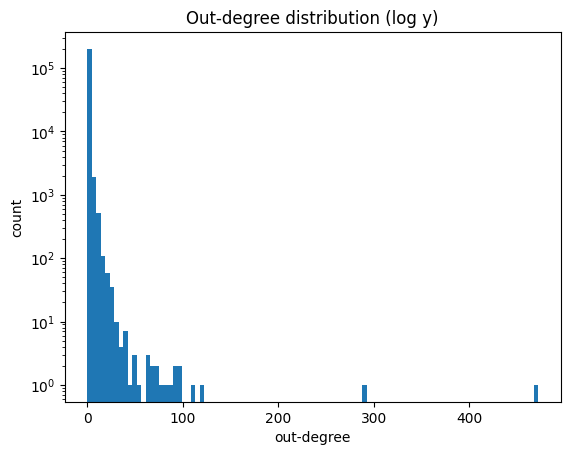

Weakly connected components: 49
Largest WCC size: 7880


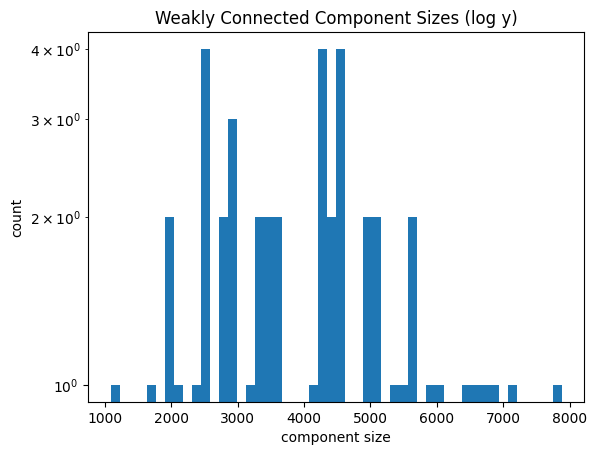


Node label availability (in graph)
class
3    157205
2     42019
1      4545
Name: count, dtype: int64

Degree stats by class (in graph)


in_deg                                                  out_deg  \
          count      mean       std  min  25%  50%  75%    max     count   
class                                                                      
1        4545.0  1.269967  7.215218  0.0  0.0  1.0  1.0  177.0    4545.0   
2       42019.0  1.909398  7.122538  0.0  0.0  1.0  1.0  284.0   42019.0   
3      157205.0  0.943685  2.136958  0.0  0.0  1.0  1.0  212.0  157205.0   

                                                      
           mean       std  min  25%  50%  75%    max  
class                                                 
1      0.741694  0.571620  0.0  0.0  1.0  1.0    3.0  
2      1.185821  3.246769  0.0  1.0  1.0  1.0  472.0  
3      1.152362  1.349530  0.0  1.0  1.0  1.0  122.0

In [7]:
import networkx as nx

# Build Graph
G = nx.from_pandas_edgelist(edges, source="txId1", target="txId2", create_using=nx.DiGraph())

print("Graph basics")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Density:", nx.density(G))

tx_set = set(features["txId"])
src_missing = (~edges["txId1"].isin(tx_set)).mean()
dst_missing = (~edges["txId2"].isin(tx_set)).mean()
print("Fraction of edges with src not in features:", src_missing)
print("Fraction of edges with dst not in features:", dst_missing)
print()

in_deg = np.array([d for _, d in G.in_degree()])
out_deg = np.array([d for _, d in G.out_degree()])

print("In-degree quantiles:", np.quantile(in_deg, [0, 0.5, 0.9, 0.99, 1]))
print("Out-degree quantiles:", np.quantile(out_deg, [0, 0.5, 0.9, 0.99, 1]))

plt.figure()
plt.hist(in_deg, bins=100)
plt.yscale("log")
plt.title("In-degree distribution (log y)")
plt.xlabel("in-degree")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(out_deg, bins=100)
plt.yscale("log")
plt.title("Out-degree distribution (log y)")
plt.xlabel("out-degree")
plt.ylabel("count")
plt.show()

wcc_sizes = [len(c) for c in nx.weakly_connected_components(G)]
print("Weakly connected components:", len(wcc_sizes))
print("Largest WCC size:", max(wcc_sizes))

plt.figure()
plt.hist(wcc_sizes, bins=50)
plt.yscale("log")
plt.title("Weakly Connected Component Sizes (log y)")
plt.xlabel("component size")
plt.ylabel("count")
plt.show()


if "class" in features.columns:
    tx_to_class = dict(zip(features["txId"], features["class"]))
else:
    tx_to_class = dict(zip(classes["txId"], classes["class"]))

tx_to_t = dict(zip(features["txId"], features["Time step"]))

nx.set_node_attributes(G, tx_to_class, "class")
nx.set_node_attributes(G, tx_to_t, "timestep")

node_df = pd.DataFrame({
    "txId": list(G.nodes()),
    "in_deg":  [G.in_degree(n) for n in G.nodes()],
    "out_deg": [G.out_degree(n) for n in G.nodes()],
    "class":   [G.nodes[n].get("class", np.nan) for n in G.nodes()],
    "Time step": [G.nodes[n].get("timestep", np.nan) for n in G.nodes()],
})

print("\nNode label availability (in graph)")
print(node_df["class"].value_counts(dropna=False))

print("\nDegree stats by class (in graph)")
display(node_df.groupby("class")[["in_deg", "out_deg"]].describe())



Graph analysis reveals that the transaction network is extremly sparse, with most nodes having only a few connections and a small number acting as hubs. The network is fragmented into multiple weakly connected components, indicating the presence of several independent transaction clusters. Severe class imbalance is observed, with illicit transactions constituting only a small fraction of nodes. Degree statistics show that illicit transactions tend to have lower connectivity than licit transactions, suggesting that illicit activity may occur in relatively isolated parts of the network rather than highly connected hubs. These structural differences indicate that graph-based features may be useful for distinguishing transaction types.

In [8]:
import networkx as nx
import plotly.graph_objs as go

# Build graph if needed
G = nx.from_pandas_edgelist(
    edges,
    source='txId1',
    target='txId2',
    create_using=nx.DiGraph()
)

# Map attributes
tx_to_t = dict(zip(features['txId'], features['Time step']))
tx_to_class = dict(zip(features['txId'], features['class']))

nx.set_node_attributes(G, tx_to_t, "timestep")
nx.set_node_attributes(G, tx_to_class, "class")

# Illicit nodes in time step 32
illicit_nodes = [
    n for n in G.nodes()
    if G.nodes[n].get("timestep") == 32
    and G.nodes[n].get("class") == 1
]

# Add neighbors
neighbors = set()
for n in illicit_nodes:
    neighbors.update(G.predecessors(n))
    neighbors.update(G.successors(n))

nodes_to_plot = set(illicit_nodes) | neighbors
subG = G.subgraph(nodes_to_plot).copy()

print("Nodes:", subG.number_of_nodes())
print("Edges:", subG.number_of_edges())

# Layout
pos = nx.spring_layout(subG, seed=42)

# Edges
edge_x = []
edge_y = []
for edge in subG.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='purple'),
    hoverinfo='none',
    mode='lines',
    showlegend=False
)

# Separate node traces for legend
def get_trace(nodes, color, name):
    x_vals = []
    y_vals = []
    texts = []

    for n in nodes:
        x_vals.append(pos[n][0])
        y_vals.append(pos[n][1])
        texts.append(str(n))

    return go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='markers',
        name=name,
        text=texts,
        hoverinfo='text',
        marker=dict(size=8, color=color)
    )

illicit_nodes_plot = [n for n in subG.nodes() if subG.nodes[n].get("class") == 1]
licit_nodes_plot = [n for n in subG.nodes() if subG.nodes[n].get("class") == 2]
unknown_nodes_plot = [n for n in subG.nodes() if subG.nodes[n].get("class") == 3]

trace_illicit = get_trace(illicit_nodes_plot, "red", "Illicit")
trace_licit = get_trace(licit_nodes_plot, "green", "Licit")
trace_unknown = get_trace(unknown_nodes_plot, "blue", "Unknown")

# Plot
fig = go.Figure(
    data=[edge_trace, trace_illicit, trace_licit, trace_unknown],
    layout=go.Layout(
        title="Illicit Transactions (Time Step 32) + 1-Hop Neighbors",
        showlegend=True,
        legend=dict(x=0, y=0),
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="#fafafa",
        paper_bgcolor="#fafafa"
    )
)

fig.show()

Nodes: 654
Edges: 620


To qualitatively inspect local structure around illicit activity, I visualized a subgraph consisting of all illicit transactions at time step 32 and their 1-hop incoming and outgoing neighbors. This neighborhood view helps reveal whether illicit transactions tend to appear isolated, clustered, or adjacent to high-degree nodes. Because the full graph is too large to visualize directly, this targeted subgraph provides an interpretable snapshot of local connectivity patterns and label composition (illicit/licit/unknown) surrounding illicit nodes.

In this snapshot, illicit nodes appear relatively sparse and often connected to only a small number of neighbors, consistent with the low average degree observed for illicit transactions.

# (E) Initial Insights and Direction

1. Severe Class Imbalance

Observation: Illicit transactions represent a very small fraction of labeled data.

Hypothesis: Rare illicit behavior requires structural graph features to improve detection beyond purely feature-based models.

---

2. Heavy-Tailed Degree Distribution

Observation: The transaction graph shows a heavy-tailed degree distribution with a few highly connected nodes.

Hypothesis: Illicit transactions exhibit different connectivity patterns (e.g., lower or higher centrality) compared to licit transactions.

---

3. Temporal Dynamics of Illicit Activity

Observation: Transaction activity varies across time steps, and illicit activity may occur in bursts.

Hypothesis: Temporal subgraphs contain distinct structural patterns that can improve illicit detection

---

4. Skewed Financial Feature Distributions

Observation: BTC transaction amounts are heavily skewed with extreme outliers.

Hypothesis: Log-transformed or normalized financial features may better capture meaningful behavioral differences.

---

5. Sparse Graph Structure and Hub Nodes

Observation: The directed transaction network is sparse with hub-like nodes.

Hypothesis: Centrality and connectivity measures will help distinguish structurally important transactions from typical ones.

---

These insights suggest that purely tabular models may be insufficient and motivate graph-based and temporal approaches. The dataset size is manageable on a standard machine, enabling experimentation with both classical graph features and lightweight GNN models.

## Potential RQs

1. Do illicit transactions occupy distinct structural positions in the transaction graph compared to licit transactions?

2. Does incorporating temporal information improve the detection of illicit transactions compared to static graph features alone?

3. Can structural graph features improve classification performance for rare illicit transactions beyond tabular financial features alone?

# Resources

On my honor, I declare the following resources:

1. Collaborators:
 - None
---

2. Web Sources:
- https://github.com/git-disl/EllipticPlusPlus/tree/main/Transactions%20Dataset
- https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset
- https://snap.stanford.edu/data/amazon-meta.html
- https://pandas.pydata.org/docs/reference/frame.html#
- https://networkx.org/documentation/stable/reference/classes/digraph.html
- https://matplotlib.org/stable/api/index.html

---

3. AI Tools:
- ChatGPT: I used ChatGPT for initial dataset selection, as well as tweaking the code from the github to better fit my EDA.

---

4. Citations
- Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics. In Proceedings of the 29th ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD ’23), August 6–10, 2023, Long Beach, CA, USA. ACM, New York, NY, USA, 16 pages. https://doi.org/10.1145/3580305.3599803
- Y. Elmougy and O. Manzi, "Anomaly Detection on Bitcoin, Ethereum Networks Using GPU-accelerated Machine Learning Methods," 2021 31st International Conference on Computer Theory and Applications (ICCTA), Alexandria, Egypt, 2021, pp. 166-171, doi: 10.1109/ICCTA54562.2021.9916625. keywords: {Support vector machines;Bitcoin;Software;Blockchains;Fraud;Software reliability;Random forests;Cryptocurrency;Blockchain;Bitcoin;Ethereum;Anomaly Detection;Fraud;Machine Learning;GPU-acceleration;SVM;Random Forest;Logistic Regression},



